In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

%matplotlib inline

In [2]:
# Assign dimensions for x and k
Nx = 1800
Nk = 100

# Assign x and k vectors
x = np.pi*np.arange(-Nx, Nx)/Nx
k = np.arange(1,Nk)

# Time the array operation
tStart = time.time()

# Form outer product of k and x, kx[i,j] = k[i]*x[j]
kx = np.outer(k,x)

# Assign each Fourier term to a row in an array and sum along columns,
# adding 1/2 to account for the k=0 term
# Use np.newaxis to extend k to have the same dimensions as kx (aka "broadcasting")
fourier = 2*np.sin(k[:, np.newaxis]*np.pi/2)/(np.pi*k[:, np.newaxis])*np.cos(kx)
y = np.sum(fourier, axis=0) + 0.5
print(f"Elapsed time: {time.time() - tStart:.3f} s")

Elapsed time: 0.008 s


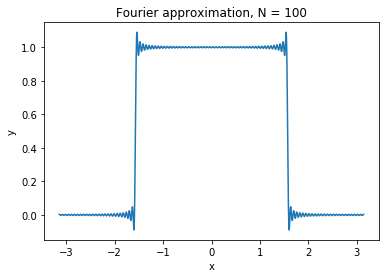

In [3]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Fourier approximation, N = {Nk:d}");

In [4]:
# Alternatively, initialize y with the k=0 term
# and add remaining terms in a loop

# Time the loop operation
tStart = time.time()

yloop = 0.5*np.ones(np.shape(x))

for i in np.arange(x.size):
    for j in np.arange(k.size):
        yloop[i] = yloop[i] + (2*np.sin(k[j]*np.pi/2))/(np.pi*k[j])*np.cos(k[j]*x[i])
        
print(f"Elapsed time: {time.time() - tStart:.3f} s")

Elapsed time: 4.488 s


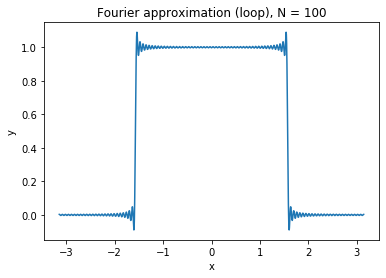

In [5]:
plt.plot(x,yloop)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Fourier approximation (loop), N = {Nk:d}");